# Wine - 베스트 모델 찾기, 와인 이진분류

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf

seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
wine = pd.read_csv("dataset/wine.csv",header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


### 데이터 전처리 

In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
wine_class = encoder.fit_transform(wine.iloc[:,12].values)

In [4]:
# 데이터 정규화 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(wine.iloc[:,:-1].values)

### 데이터셋 나누기 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, wine_class, stratify=wine_class, random_state=seed)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872,), (1625,))

### 모델 정의 / 설정

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [9]:
# 모델 저장 관련 설정
model_path = 'model/best_wine_{epoch:03d}_{val_loss:.4f}.h5'
# 앞으로는 밑에처럼 하면 바로 베스트모델 하나 나옴
# model_path = 'model/best_wine.h5'

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(
    model_path, monitor='val_loss', verbose=1, save_best_only=True
)

### 모델 학습 및 저장 

In [12]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.63452, saving model to model\best_wine_001_0.6345.h5

Epoch 00002: val_loss improved from 0.63452 to 0.57737, saving model to model\best_wine_002_0.5774.h5

Epoch 00003: val_loss improved from 0.57737 to 0.51327, saving model to model\best_wine_003_0.5133.h5

Epoch 00004: val_loss improved from 0.51327 to 0.45118, saving model to model\best_wine_004_0.4512.h5

Epoch 00005: val_loss improved from 0.45118 to 0.38812, saving model to model\best_wine_005_0.3881.h5

Epoch 00006: val_loss improved from 0.38812 to 0.32422, saving model to model\best_wine_006_0.3242.h5

Epoch 00007: val_loss improved from 0.32422 to 0.26086, saving model to model\best_wine_007_0.2609.h5

Epoch 00008: val_loss improved from 0.26086 to 0.20673, saving model to model\best_wine_008_0.2067.h5

Epoch 00009: val_loss improved from 0.20673 to 0.15826, saving model to model\best_wine_009_0.1583.h5

Epoch 00010: val_loss improved from 0.15826 to 0.12070, saving model to mode

### 평가는 베스트 모델로 해야 함.

In [13]:
from tensorflow.keras.models import load_model
best_model = load_model('model/best_wine_141_0.0279.h5')

In [14]:
best_model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 580us/step - loss: 0.0270 - accuracy: 0.9920


[0.02697831206023693, 0.9919999837875366]

### 훈련과정 시각화 

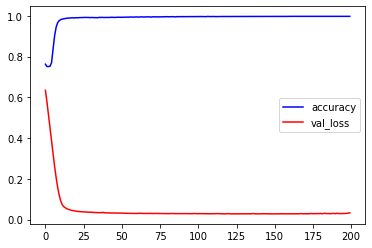

In [15]:
import matplotlib.pylab as plt
%matplotlib inline

y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_acc, 'b-',markersize=5, label='accuracy')
plt.plot(x_len, y_vloss, 'r-',markersize=5, label='val_loss')
plt.legend()
plt.show()